# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64
fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


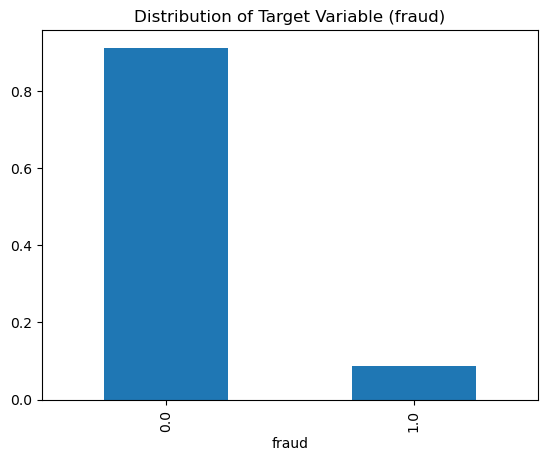

In [3]:
# Check the distribution of the target variable 'fraud'
fraud['fraud'].value_counts(normalize=True).plot(kind='bar', title='Distribution of Target Variable (fraud)')
print(fraud['fraud'].value_counts())
print(fraud['fraud'].value_counts(normalize=True))

In [4]:
# Based on the distribution printed in the previous cell, let's interpret the results:
# If one class is much less frequent than the other, the dataset is imbalanced.

fraud_counts = fraud['fraud'].value_counts(normalize=True)
print("Class distribution (as proportion):")
print(fraud_counts)

if fraud_counts.min() < 0.4:
    print("Yes, we are dealing with an imbalanced dataset.")
else:
    print("No, the dataset is relatively balanced.")

Class distribution (as proportion):
fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64
Yes, we are dealing with an imbalanced dataset.


In [5]:
from sklearn.linear_model import LogisticRegression

# Prepare features and target
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (includes precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC score (important for imbalanced datasets)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[226646   1503]
 [  8713  13138]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9630    0.9934    0.9780    228149
         1.0     0.8973    0.6013    0.7200     21851

    accuracy                         0.9591    250000
   macro avg     0.9302    0.7973    0.8490    250000
weighted avg     0.9572    0.9591    0.9554    250000

ROC-AUC Score: 0.9672


In [7]:
from sklearn.utils import resample

# Concatenate X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_data[train_data['fraud'] == 0]
minority = train_data[train_data['fraud'] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine majority and upsampled minority
train_upsampled = pd.concat([majority, minority_upsampled])

# Shuffle the dataset
train_upsampled = train_upsampled.sample(frac=1, random_state=42)

# Split back into X and y
X_train_upsampled = train_upsampled.drop('fraud', axis=1)
y_train_upsampled = train_upsampled['fraud']

# Train Logistic Regression on upsampled data
logreg_upsampled = LogisticRegression(max_iter=1000, random_state=42)
logreg_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Evaluate on the original test set
y_pred_upsampled = logreg_upsampled.predict(X_test)
y_proba_upsampled = logreg_upsampled.predict_proba(X_test)[:, 1]

print("Confusion Matrix (Oversampled):")
print(confusion_matrix(y_test, y_pred_upsampled))

print("\nClassification Report (Oversampled):")
print(classification_report(y_test, y_pred_upsampled, digits=4))

roc_auc_upsampled = roc_auc_score(y_test, y_proba_upsampled)
print(f"ROC-AUC Score (Oversampled): {roc_auc_upsampled:.4f}")

Confusion Matrix (Oversampled):
[[212920  15229]
 [  1128  20723]]

Classification Report (Oversampled):
              precision    recall  f1-score   support

         0.0     0.9947    0.9332    0.9630    228149
         1.0     0.5764    0.9484    0.7170     21851

    accuracy                         0.9346    250000
   macro avg     0.7856    0.9408    0.8400    250000
weighted avg     0.9582    0.9346    0.9415    250000

ROC-AUC Score (Oversampled): 0.9796


In [8]:
from sklearn.utils import resample

# Undersample the majority class

# Concatenate X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_data[train_data['fraud'] == 0]
minority = train_data[train_data['fraud'] == 1]

# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Combine minority and downsampled majority
train_downsampled = pd.concat([majority_downsampled, minority])

# Shuffle the dataset
train_downsampled = train_downsampled.sample(frac=1, random_state=42)

# Split back into X and y
X_train_downsampled = train_downsampled.drop('fraud', axis=1)
y_train_downsampled = train_downsampled['fraud']

# Train Logistic Regression on downsampled data
logreg_downsampled = LogisticRegression(max_iter=1000, random_state=42)
logreg_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Evaluate on the original test set
y_pred_downsampled = logreg_downsampled.predict(X_test)
y_proba_downsampled = logreg_downsampled.predict_proba(X_test)[:, 1]

print("Confusion Matrix (Undersampled):")
print(confusion_matrix(y_test, y_pred_downsampled))

print("\nClassification Report (Undersampled):")
print(classification_report(y_test, y_pred_downsampled, digits=4))

roc_auc_downsampled = roc_auc_score(y_test, y_proba_downsampled)
print(f"ROC-AUC Score (Undersampled): {roc_auc_downsampled:.4f}")

Confusion Matrix (Undersampled):
[[212774  15375]
 [  1105  20746]]

Classification Report (Undersampled):
              precision    recall  f1-score   support

         0.0     0.9948    0.9326    0.9627    228149
         1.0     0.5743    0.9494    0.7157     21851

    accuracy                         0.9341    250000
   macro avg     0.7846    0.9410    0.8392    250000
weighted avg     0.9581    0.9341    0.9411    250000

ROC-AUC Score (Undersampled): 0.9797


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE data
logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

# Evaluate on the original test set
y_pred_smote = logreg_smote.predict(X_test)
y_proba_smote = logreg_smote.predict_proba(X_test)[:, 1]

print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))

print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote, digits=4))

roc_auc_smote = roc_auc_score(y_test, y_proba_smote)
print(f"ROC-AUC Score (SMOTE): {roc_auc_smote:.4f}")

Confusion Matrix (SMOTE):
[[213125  15024]
 [  1173  20678]]

Classification Report (SMOTE):
              precision    recall  f1-score   support

         0.0     0.9945    0.9341    0.9634    228149
         1.0     0.5792    0.9463    0.7186     21851

    accuracy                         0.9352    250000
   macro avg     0.7869    0.9402    0.8410    250000
weighted avg     0.9582    0.9352    0.9420    250000

ROC-AUC Score (SMOTE): 0.9793
